### Нахождениие матрицы схожести для валидационного сета

In [ ]:
# стоп-слова
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

In [ ]:
import pandas as pd

df_valid = pd.read_csv('brand_tweets_valid.csv', sep=',', encoding='utf8')
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

from sklearn.feature_extraction.text import CountVectorizer # BoW
import nltk
import string
import pandas as pd
from itertools import chain
import numpy as np

nltk.download('punkt')

def tokenize_text(raw_text: str):
  tokenized_str = nltk.word_tokenize(raw_text)
  tokens = [i.lower() for i in tokenized_str if (i not in string.punctuation)]
  filtered_tokens = [i for i in tokens if (i not in stop_words)]
  return filtered_tokens

vectorizer = CountVectorizer(tokenizer=tokenize_text)
document_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
document_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<402x1760 sparse matrix of type '<class 'numpy.int64'>'
	with 4927 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import pairwise_distances
tweet_distance = pairwise_distances(document_matrix, metric="cosine") # косинусное расстояние
tweet_distance.shape

(402, 402)

### top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [ ]:
test_tweet_index = 14

print(df_valid.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')

sorted_similarity = np.argsort(tweet_distance[test_tweet_index,:])

print('id top-5 твитов, похожих на твит валидационного сета с id=14 (кроме его самого):')
print(list(sorted_similarity[sorted_similarity != 14][:5]))

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------

id top-5 твитов, похожих на твит валидационного сета с id=14 (кроме его самого):
[132, 16, 163, 6, 341]


### Поиск дубликатов в тексте

In [ ]:
print('Shape:', tweet_distance.shape)
print('Count:', tweet_distance.shape[0]*tweet_distance.shape[1])
print('min, max: {min}, {max}'.format(
    min=tweet_distance.min(),
    max=tweet_distance.max()
))

Shape: (402, 402)
Count: 161604
min, max: 0.0, 1.0


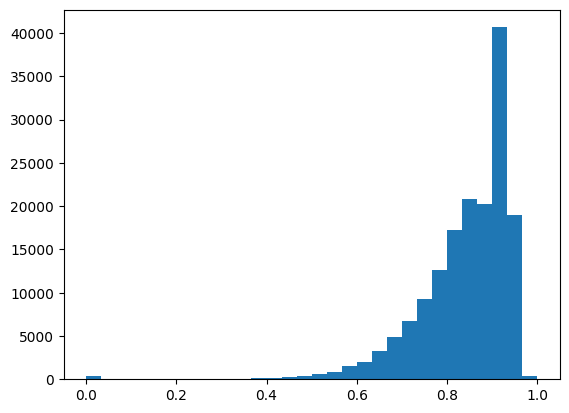

In [ ]:
from matplotlib import pyplot as plt

plt.hist(
    tweet_distance.reshape(
        (tweet_distance.shape[0]*tweet_distance.shape[1], 1)
    ),
    bins=30
);

In [ ]:
def find_similar(index: int, matrix, threshold: float):
  similarity_vector = tweet_distance[test_tweet_index,:]
  return np.where(similarity_vector > threshold)

find_similar(
    index=14,
    matrix=document_matrix,
    threshold=0.85
)

(array([  0,   1,   4,   7,   8,   9,  10,  11,  18,  19,  25,  26,  27,
         30,  32,  33,  34,  36,  37,  38,  39,  40,  41,  43,  44,  45,
         46,  48,  50,  52,  54,  56,  57,  59,  60,  61,  66,  70,  73,
         74,  75,  76,  77,  79,  80,  82,  83,  84,  85,  86,  87,  89,
         90,  91,  92,  93,  94,  95,  96,  97, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 119,
        122, 124, 125, 126, 127, 128, 130, 137, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 159,
        160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187,
        188, 189, 190, 191, 193, 194, 196, 197, 198, 199, 201, 202, 208,
        209, 210, 211, 213, 214, 216, 217, 218, 220, 221, 222, 223, 227,
        228, 229, 230, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242,
        243, 244, 245, 246, 247, 248, 249, 250, 251